In [1]:
cd ..

/home/user/Documents/workspace/projects/accident-prediction-montreal


In [2]:
from preprocess import get_positive_samples
from utils import init_spark

In [3]:
spark = init_spark()

Spark Session created
Parameters:
	spark.serializer: org.apache.spark.serializer.KryoSerializer
	spark.driver.memory: 3g
	spark.driver.port: 35665
	spark.rdd.compress: True
	spark.serializer.objectStreamReset: 100
	spark.master: local[*]
	spark.executor.id: driver
	spark.submit.deployMode: client
	spark.app.id: local-1555304069553
	spark.ui.showConsoleProgress: true
	spark.driver.host: 192.168.100.49
	spark.app.name: Accident prediction


In [4]:
from time import time
import subprocess

def get_mem_usage():
    a = subprocess.check_output(['vmstat', '1', '1']).decode("utf-8") 
    b = a.split('\n')[2].split()
    return b[2], b[4], b[5]


times = list()
swap = list()
buff = list()
cache = list()
for limit in range(0, 900, 100):
    print("limit: ", limit)
    t = time()
    df = get_positive_samples(spark, limit=limit, use_cache=True)
    s, b, c = get_mem_usage()
    swap.append(s)
    buff.append(b)
    cache.append(c)
    times.append(time()-t)

limit:  0
limit:  100
limit:  200
limit:  300
limit:  400
limit:  500
limit:  600
limit:  700
limit:  800


In [5]:
#df2 = spark.read.parquet("data/positive-samples.parquet")

In [6]:
#

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'time (s)')

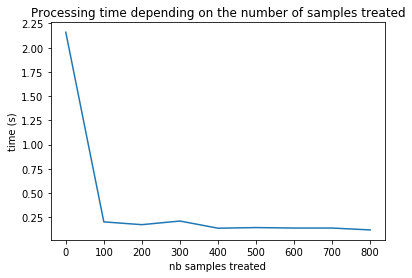

In [8]:
x = np.asarray(range(0, 900, 100))
y = np.asarray(times)

plt.plot(x, y)
plt.title("Processing time depending on the number of samples treated")
plt.xlabel("nb samples treated")
plt.ylabel("time (s)")

Text(0.5, 0, 'nb samples treated')

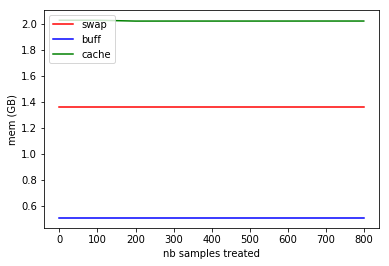

In [9]:
import pylab 
x = np.asarray(range(0, 900, 100))
y1= np.asarray([float(i)/1000000 for i in swap])
y2= np.asarray([float(i)/1000000 for i in buff])
y3= np.asarray([float(i)/1000000 for i in cache])

pylab.plot(x, y1, '-r', label='swap')
pylab.plot(x, y2, '-b', label='buff')
pylab.plot(x, y3, '-g', label='cache')
pylab.legend(loc='upper left')
pylab.ylabel("mem (GB)")
pylab.xlabel("nb samples treated")